In [1]:
import pandas as pd 
import numpy as np 
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from statsmodels.regression.linear_model import yule_walker
from sporco.admm import bpdn

In [2]:
test = pd.read_csv("FordB_TEST_cleared.csv")
train = pd.read_csv("FordB_TRAIN_cleared.csv")

In [92]:
test = pd.read_csv("FordB_TEST_denoised.csv")
train = pd.read_csv("FordB_TRAIN_denoised.csv")

In [3]:
test_np = test.to_numpy()
train_np = train.to_numpy()

In [4]:
def periodogram(x,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    X=np.fft.fftshift(X)
    Gammax=(np.abs(X)**2)/N
    # Computation the frequency vector
    f=np.fft.fftfreq(N, d=1/Fs)
    f=np.fft.fftshift(f)
    return Gammax,f  

In [5]:
def low_pass_filter(x,fc,Fs):
    wc=fc/(Fs/2)
    b, a = signal.butter(4, wc, 'low')
    y = signal.filtfilt(b, a, x)
    return y    

In [6]:
# Function to compute the centered Fast Fourier Transform (FFT)
def my_fft(x,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    X=np.fft.fftshift(X)
    # Computation the frequency vector
    f=np.fft.fftfreq(N, d=1/Fs)
    f=np.fft.fftshift(f)
    return X,f

In [7]:
def my_spectrogram(x,Nw,No,Fs):
    f, t, Sxx = signal.stft(x, fs=Fs,nperseg=Nw, noverlap=No, nfft=4*Nw)
    return f,t,Sxx

In [8]:
test

,-0.20084387,-0.43778557,-0.40963294,-1.5579956,1.5646344,-0.40602692,-0.93801284,0.29068802,0.75386629,-0.28602854,...,0.43113081,-0.52707986,0.66209259,-0.24505216,1.3621688,-1.9289218,0.48793075,-0.035152322,-0.10885661,0.5351925
0,-0.138032,-0.369755,-0.755134,-0.612150,1.439392,-0.755293,-0.597964,0.517163,0.702941,-0.458640,...,0.303974,-0.429051,0.574848,-0.570181,1.357881,-1.436799,-0.199459,0.204034,-0.417685,0.520696
1,-0.015932,-0.104726,-0.972525,0.375694,1.248636,-1.049651,-0.274812,0.713340,0.643560,-0.598146,...,0.105533,-0.107942,0.381259,-0.791709,1.105752,-0.833880,-0.885298,0.391060,-0.680489,0.507400
2,0.128919,0.205002,-1.059597,1.268595,0.986272,-1.235926,0.006090,0.853314,0.570320,-0.681861,...,-0.126402,0.415395,0.116924,-0.896956,0.690675,-0.185824,-1.533617,0.479063,-0.860704,0.459635
3,0.278441,0.458375,-1.028352,1.981821,0.655790,-1.299707,0.234356,0.933860,0.453244,-0.695936,...,-0.330461,0.978033,-0.168976,-0.897677,0.226431,0.449865,-2.105453,0.437900,-0.939303,0.340370
4,0.412761,0.532308,-0.921790,2.447510,0.274042,-1.243178,0.397654,0.943435,0.271122,-0.648508,...,-0.472484,1.495154,-0.422746,-0.823809,-0.152478,1.008215,-2.569872,0.268967,-0.917381,0.114092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,-0.641483,-0.722243,0.678295,0.398295,0.078685,-0.527710,1.205025,-0.991392,0.681423,0.512003,...,-0.967953,0.072039,1.337739,0.167052,0.635990,0.612861,-0.571443,0.448048,-1.521946,0.350424
492,-0.518031,-0.973511,0.497624,0.532220,0.133078,-0.655546,1.159540,-0.847316,0.452858,1.124638,...,-0.336504,0.441164,1.626807,0.577276,0.605298,0.806306,-0.562066,0.900216,-1.647569,0.399121
493,-0.302083,-1.174684,0.258157,0.628262,0.208365,-0.739947,0.950384,-0.636030,0.133236,1.562421,...,0.275503,0.689262,1.866597,0.968892,0.452823,0.938635,-0.581975,1.261594,-1.644603,0.440792
494,-0.037920,-1.318469,-0.010971,0.677332,0.338477,-0.775617,0.608543,-0.413085,-0.240788,1.790738,...,0.777405,0.801610,2.095352,1.307114,0.209107,0.952273,-0.619147,1.410175,-1.549760,0.496031


In [9]:
train

,0.18021198,0.63355733,0.95954679,-1.3835289,0.37249135,-0.97869278,-0.14374977,-0.034371276,0.42819347,-0.31827998,...,0.11667405,-2.0590441,-0.67318419,0.57860486,0.39760181,-0.54920431,1.0365627,0.089960421,-0.57097186,0.17914867
0,0.729356,0.097815,0.991248,-1.503270,0.081209,-1.106545,0.020602,0.360327,-0.617736,-0.402332,...,1.113551,-1.793168,-1.006807,0.683139,0.372456,-0.892940,1.328910,0.242274,-0.770305,0.394775
1,1.226720,-0.323979,0.996443,-1.538072,-0.188529,-1.151005,0.208502,0.676554,-1.560827,-0.417710,...,1.839413,-1.344214,-1.305746,0.750099,0.371592,-1.230285,1.359541,0.297457,-0.834462,0.579864
2,1.584864,-0.522682,0.959983,-1.420004,-0.464427,-1.092906,0.388583,0.898189,-2.161364,-0.375630,...,2.114613,-0.735953,-1.521756,0.790082,0.340512,-1.532487,1.094660,0.262917,-0.734030,0.702301
3,1.719098,-0.501078,0.831277,-1.121234,-0.759484,-0.925887,0.534743,1.012621,-2.341442,-0.297329,...,1.862756,-0.027461,-1.625539,0.791058,0.230686,-1.743678,0.619646,0.149513,-0.483407,0.734467
4,1.622404,-0.309937,0.580112,-0.669089,-1.068931,-0.660144,0.621079,1.013313,-2.130075,-0.204568,...,1.177279,0.701982,-1.596785,0.746538,0.007855,-1.819794,0.063453,0.003843,-0.152552,0.675013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-0.953811,-1.146848,-0.283385,1.489297,0.685075,-0.301798,-0.356266,0.546028,0.066426,1.599389,...,0.171857,0.390319,-0.117428,0.652591,0.612596,-1.513273,-0.725529,1.049704,-0.585050,-0.223723
493,-1.213037,-1.082185,-0.312471,1.608930,0.552655,-0.198051,0.359730,0.772912,0.819136,1.739315,...,0.457147,0.695585,-0.690224,0.434255,0.677208,-1.043628,-0.351051,0.965137,-0.071877,-0.085119
494,-1.418047,-0.872399,-0.282186,1.509580,0.467893,-0.110922,1.088980,0.954223,1.417488,1.771908,...,0.625807,0.943690,-1.211930,0.164724,0.710981,-0.497955,-0.045527,0.718096,0.457605,0.028769
495,-1.515915,-0.599113,-0.173181,1.298080,0.454164,-0.036004,1.664278,1.091453,1.765063,1.672086,...,0.560031,1.111682,-1.622384,-0.162904,0.720012,0.044068,0.189317,0.342539,0.958912,0.111297


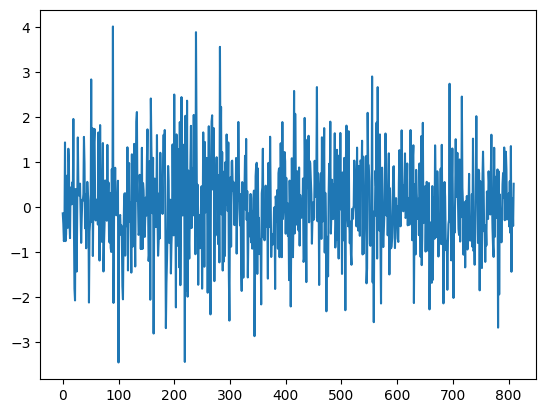

In [11]:
plt.plot([i for i in range(len(test_np[0,:]))], test_np[0,:])
plt.show()

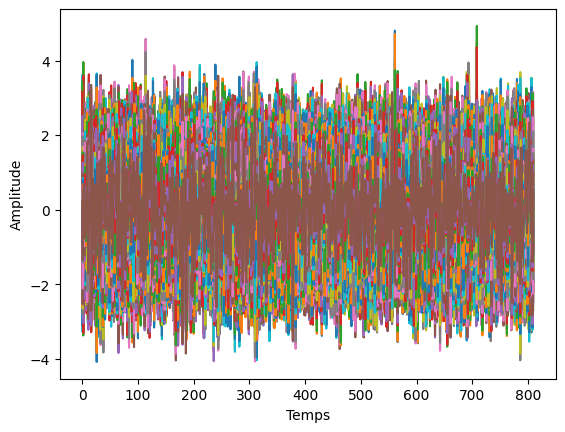

In [14]:
for i in range(len(test_np[:,0])) : 
    plt.plot([j for j in range(len(test_np[i,:]))], test_np[i,:])
    plt.xlabel('Temps')
    plt.ylabel('Amplitude')
    
plt.show()

In [15]:
x = test_np[:,0]
Fs = 0.1

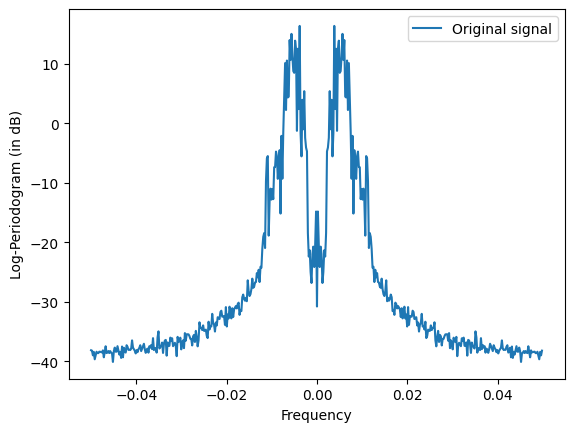

In [16]:
# Plots of the log-periodograms of x[n] and y[n]
Gammax,f=periodogram(x,Fs)
plt.figure("Plots of the log-periodograms of x[n] and y[n]")
plt.plot(f,10*np.log10(Gammax))
plt.ylabel('Log-Periodogram (in dB)')
plt.xlabel('Frequency')
#plt.xlim((0,20))
plt.legend(('Original signal', 'Noisy signal'))
plt.show()

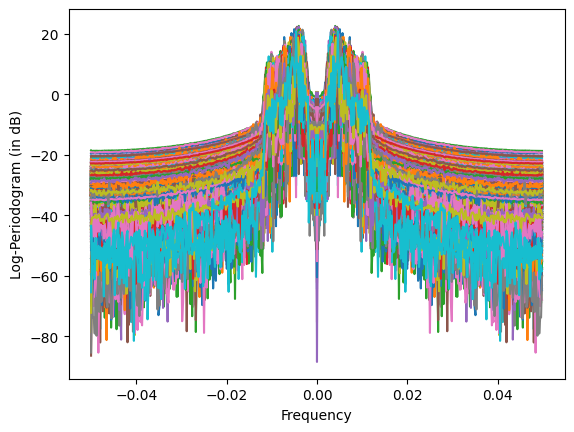

In [17]:
for i in range(len(test_np[0,:])) : 
    x= test_np[:,i]
    Gammax,f=periodogram(x,Fs)
    plt.figure("Plots of the log-periodograms of x[n] and y[n]")
    plt.plot(f,10*np.log10(Gammax))
    plt.ylabel('Log-Periodogram (in dB)')
    plt.xlabel('Frequency')
    #plt.xlim((0,20))
    #plt.legend(('Original signal', 'Noisy signal'))
    
plt.show()

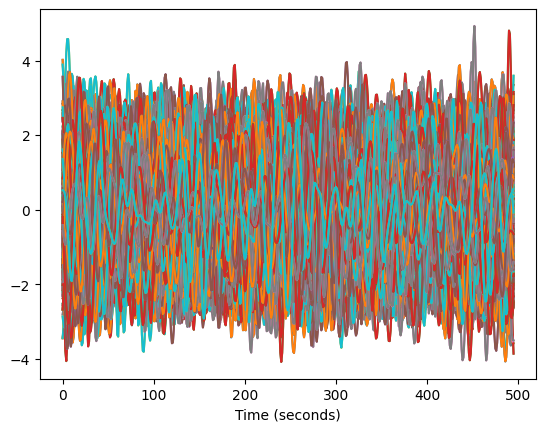

In [18]:
for i in range(len(test_np[0,:])) : 
    fc=0.020
    x= test_np[:,i]
    t = [i for i in range(len(x))]
    x1_hat=low_pass_filter(x,fc,Fs)
    #plt.figure("Denoising with low-pass filter")
    plt.plot(t,x)
    plt.plot(t,x1_hat)
    #plt.xlim((0,(N-1)/Fs))
    plt.xlabel('Time (seconds)')
    #plt.legend(('Original signal', 'Denoised signal'))
plt.show()

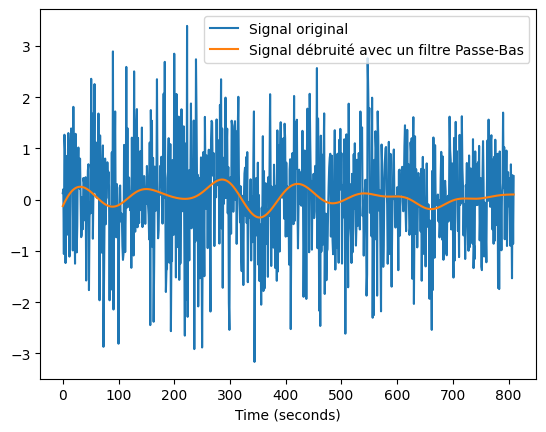

In [27]:
fc=0.010
x= test_np[:,2]
t = [i for i in range(len(x))]
x1_hat=low_pass_filter(x,fc,Fs)
#plt.figure("Denoising with low-pass filter")
plt.plot(t,x)
plt.plot(t,x1_hat)
#plt.xlim((0,(N-1)/Fs))
plt.xlabel('Time (seconds)')
plt.legend(('Signal original', 'Signal débruité avec un filtre Passe-Bas'))

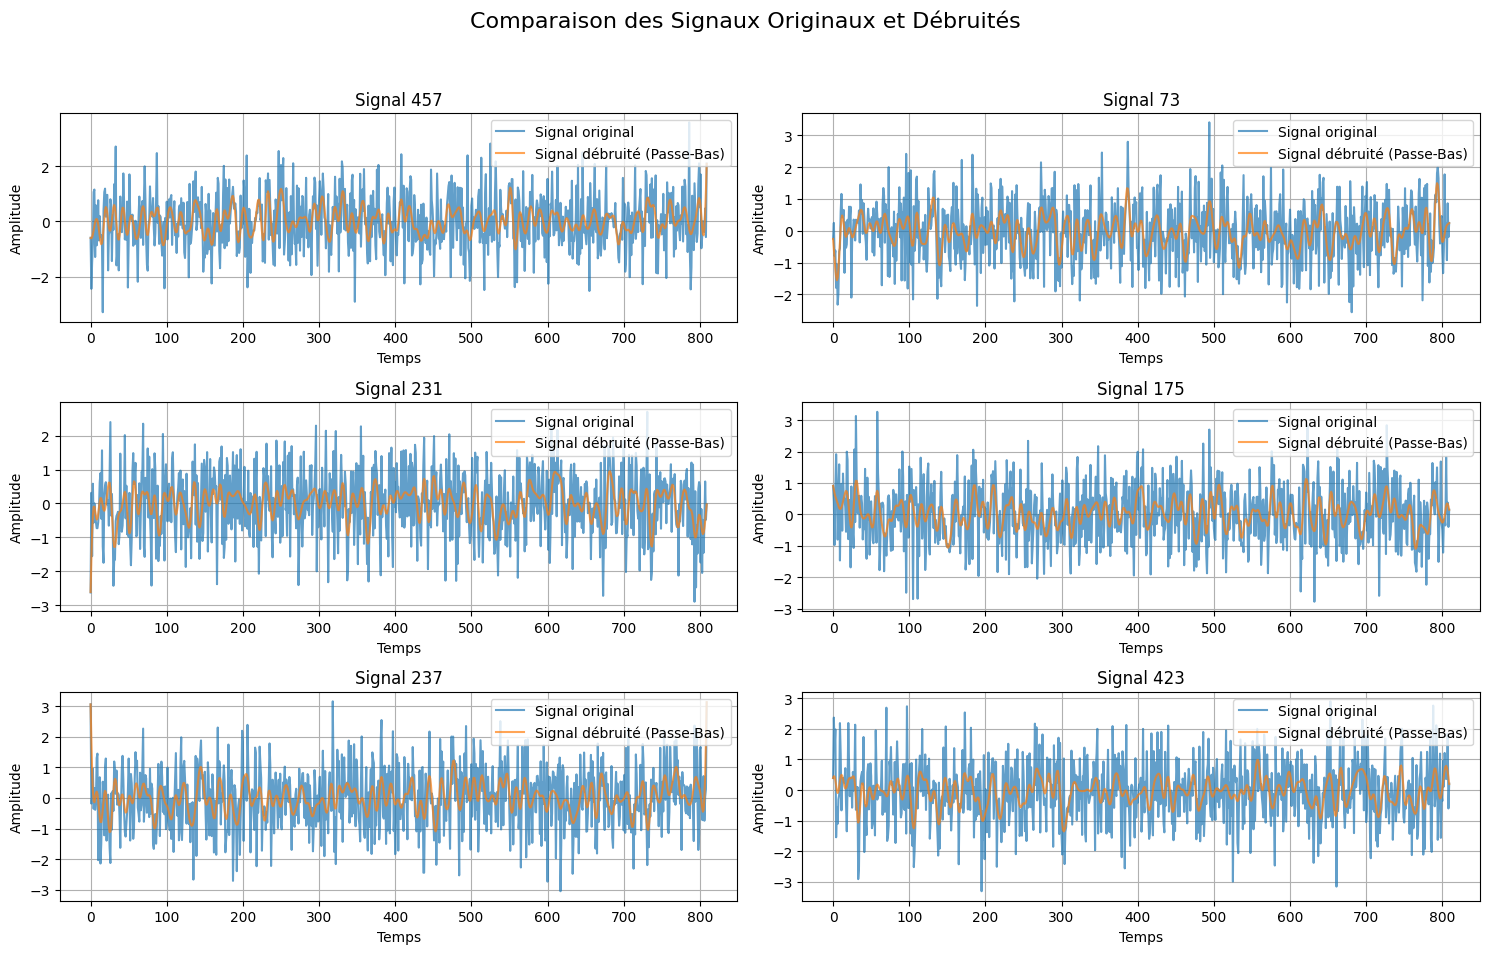

In [22]:
test_np = test.values.T  # Transposer si nécessaire pour avoir les signaux en colonnes
Fs = 1.0  # Si vous n'avez pas la fréquence réelle, utilisez Fs = 1
fc = 0.1  # En unités normalisées (puisque Fs = 1)

# Sélectionner 6 signaux aléatoires
np.random.seed(42)  # Pour la reproductibilité
num_signals = 6
total_signals = test_np.shape[1]
signal_indices = np.random.choice(total_signals, size=num_signals, replace=False)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.suptitle('Comparaison des Signaux Originaux et Débruités', fontsize=16)

for idx, ax in zip(signal_indices, axs.flatten()):
    x = test_np[:, idx]
    t = np.arange(len(x)) / Fs  # Temps (utilise les indices si Fs = 1)
    x_filtered = low_pass_filter(x, fc, Fs)
    
    ax.plot(t, x, label='Signal original', alpha=0.7)
    ax.plot(t, x_filtered, label='Signal débruité (Passe-Bas)', alpha=0.7)
    
    ax.set_xlabel('Temps')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Signal {idx}')
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuster l'espacement pour le titre principal
plt.show()


In [62]:


# Charger l'ensemble de test
test = pd.read_csv("FordB_TRAIN_cleared.csv")

# Convertir le DataFrame en un tableau NumPy pour faciliter le traitement
test_np = test.values.T  # Transposer si nécessaire pour que les signaux soient en colonnes

Fs = 1.0  # Si vous n'avez pas la fréquence réelle, utilisez Fs = 1

fc = 0.15
denoised_signals = np.zeros_like(test_np)

for i in range(test_np.shape[1]):
    x = test_np[:, i]
    x_filtered = low_pass_filter(x, fc, Fs)
    denoised_signals[:, i] = x_filtered

# Convertir les signaux débruités en DataFrame pour sauvegarde
denoised_df = pd.DataFrame(denoised_signals.T)  # Transposer pour retrouver la forme originale

# Sauvegarder le DataFrame dans un nouveau fichier CSV
denoised_df.to_csv("FordB_TRAIN_denoised.csv", index=False)

print("Les signaux débruités ont été sauvegardés dans 'FordB_TEST_denoised.csv'.")


Les signaux débruités ont été sauvegardés dans 'FordB_TEST_denoised.csv'.


C:\Users\merle\miniconda3\envs\ARIA\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\merle\miniconda3\envs\ARIA\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


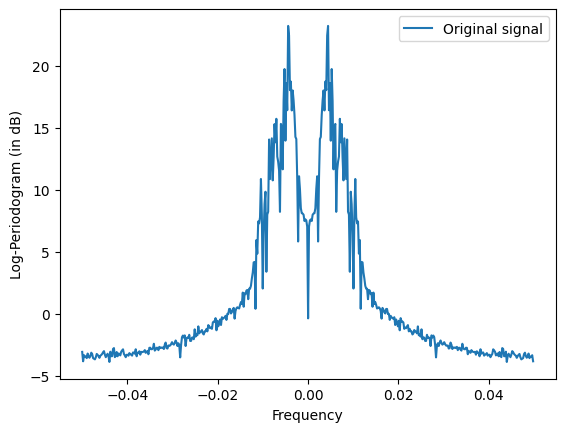

In [63]:
Gammax,f=my_fft(x,Fs)
plt.figure("Plots of the log-periodograms of x[n] and y[n]")
plt.plot(f,10*np.log10(Gammax))
plt.ylabel('Log-Periodogram (in dB)')
plt.xlabel('Frequency')
#plt.xlim((0,20))
plt.legend(('Original signal', 'Noisy signal'))
plt.show()

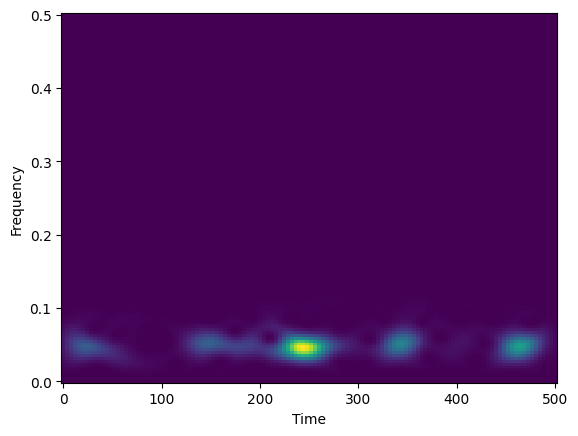

In [72]:
Nw=64 # Window length
No=60 # Overlap length
f, t, Sxx = my_spectrogram(x,Nw,No,Fs)
plt.figure("Spectrogram")
plt.pcolormesh(t, f, np.abs(Sxx)**2,shading='auto')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()               

In [6]:
import random

class Data():
    def __init__(self, index, values):
        self.index = index
        self.values = values

datas = []
for index in range(test_np.shape[0]):
    datas.append(Data(index, test_np[index, :]))

random.seed(42)  # Pour assurer la reproductibilité
datas = random.sample(datas, 8)


In [44]:
import math
def plot_spectrogram(datas, time_window_length, overlap_length, Fs):
    plt.clf()

    # Calculate number of rows and columns (can be square or based on your preference)
    cols = math.ceil(math.sqrt(len(datas)))  # Try to make the figure roughly square
    rows = math.ceil(len(datas) / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

    # Flatten the axes array for easy iteration (only if more than 1 row/column)
    axes = axes.flatten()

    # Now plot something on each subplot
    for  i, data in enumerate(datas):

        f,t,Sxx = my_spectrogram(data.values, time_window_length, overlap_length, Fs)
        im = axes[i].pcolormesh(t,f,np.abs(Sxx)**2, shading='auto') # Replace with your actual plot logic
        fig.colorbar(im, ax=axes[i])
        axes[i].set_title(f'Spectrogram Data {i}')
        axes[i].set_xlabel('Temps (s)')
        axes[i].set_ylabel('Fréquence (Hz)')


    # Hide unused subplots if any
    for i in range(len(datas), rows * cols):
        fig.delaxes(axes[i])  # Deletes the extra subplots

    plt.tight_layout()
    plt.show()


<Figure size 640x480 with 0 Axes>

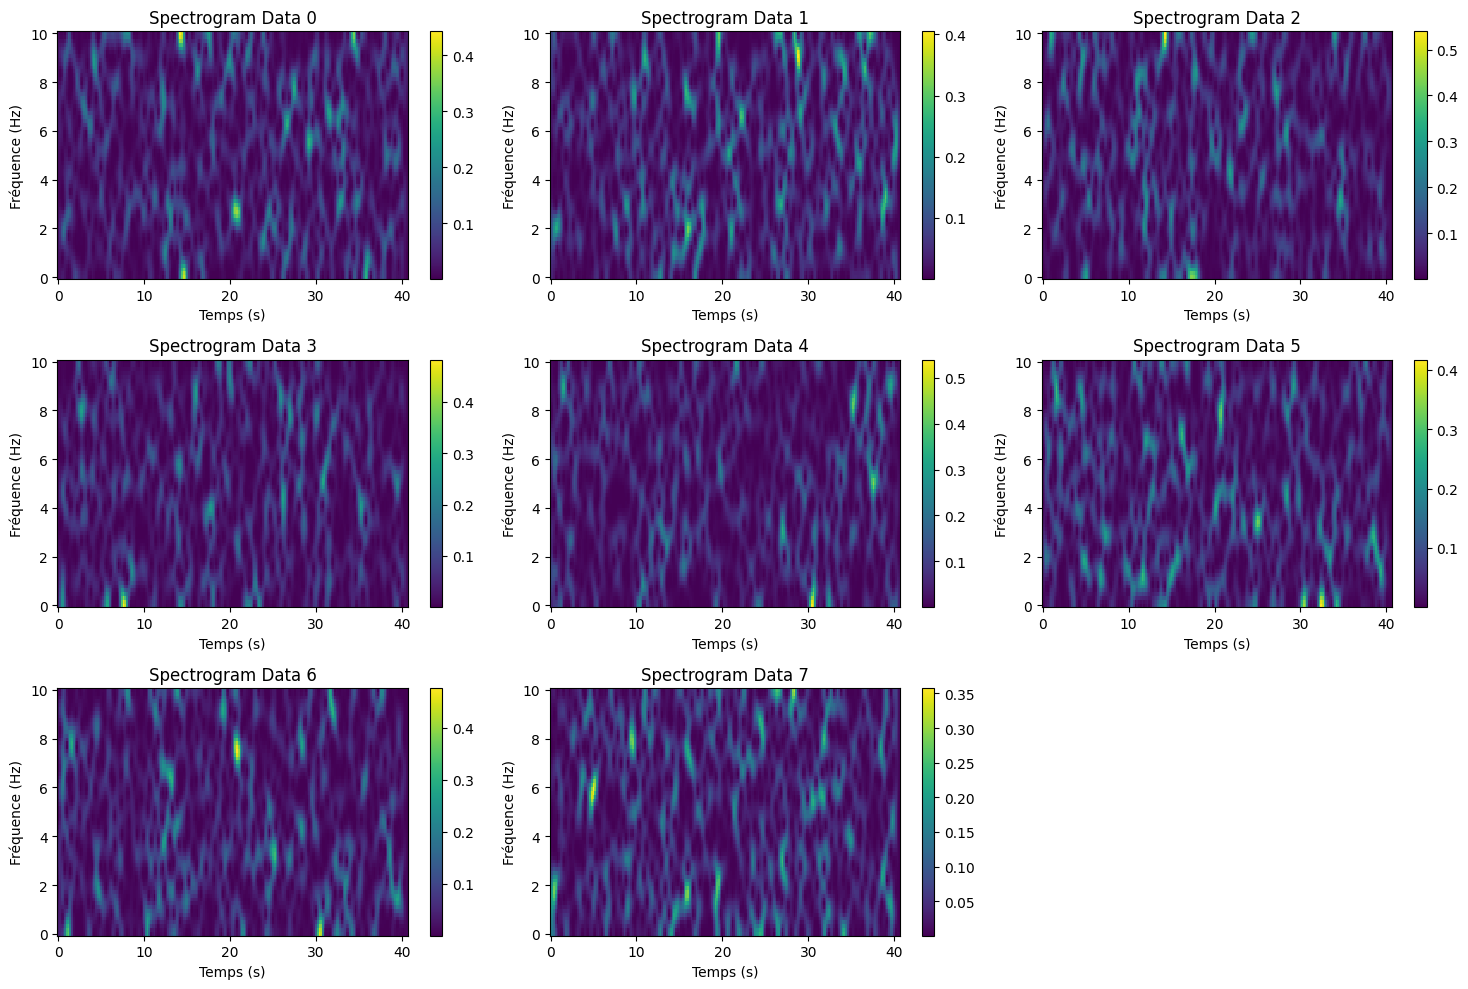

In [45]:
### import math 
Fs = 20
time_window_length = 32
overlap_length = 28
plot_spectrogram(datas, time_window_length, overlap_length, Fs)

In [4]:
# Biased estimator of the autocorrelation function
# lags are comprised between -maxLags and +maxLags
def autocorrelation(x,maxLags):
    N=len(x)
    gammax=np.correlate(x,x,'full')/N
    lags=np.arange(-maxLags,maxLags+1)
    gammax=gammax[N-maxLags-1:N+maxLags]
    return gammax,lags

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
C:\Users\merle\AppData\Local\Temp\ipykernel_43428\3761930039.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{\gamma}_x[m]$')


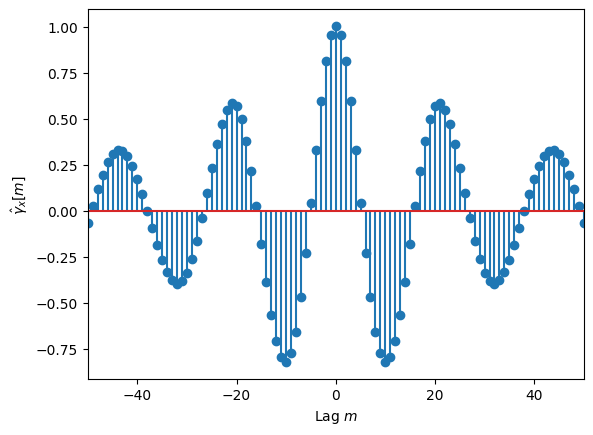

Largest value : 1.0037960764454767 for m=0
Second largest value : 0.9539643816990944 for m=-1


In [55]:
# Plot the autocorrelation function
maxLags=50
gammax,lags=autocorrelation(x,maxLags)
plt.figure("Plot of the autocorrelation function")
plt.stem(lags,gammax)
plt.xlabel('Lag $m$')
plt.xlim((-maxLags,maxLags))
plt.ylabel('$\hat{\gamma}_x[m]$')
plt.show()

# Determination of the largest values
k=np.argsort(gammax)
print("Largest value : {} for m={}".format(gammax[k[-1]],lags[k[-1]]))
print("Second largest value : {} for m={}".format(gammax[k[-2]],lags[k[-2]]))

<Figure size 640x480 with 0 Axes>

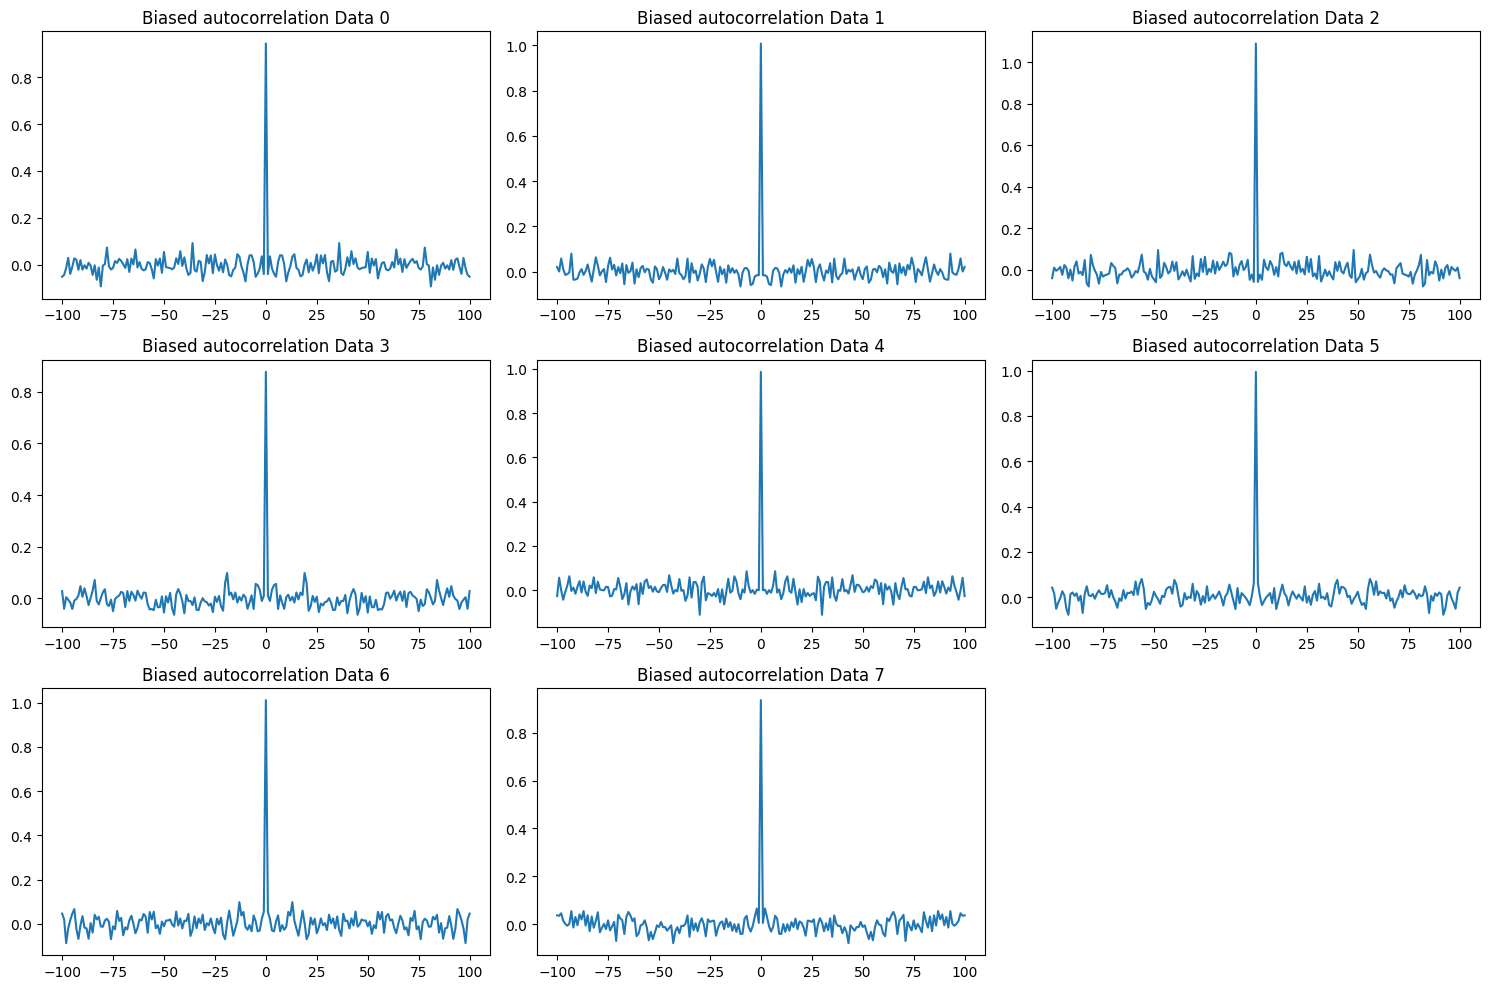

In [10]:
import math 

plt.clf()

maxLags = 100
datas_number = len(datas)

# Calculate number of rows and columns (can be square or based on your preference)
cols = math.ceil(math.sqrt(datas_number))  # Try to make the figure roughly square
rows = math.ceil(datas_number / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (only if more than 1 row/column)
axes = axes.flatten()

# Now plot something on each subplot
for  i, data in enumerate(datas):

    gammax,lags = autocorrelation(data.values, maxLags)
    

    axes[i].plot(lags, gammax)  # Replace with your actual plot logic
    axes[i].set_title(f'Biased autocorrelation Data {i}')
    


# Hide unused subplots if any
for i in range(datas_number, rows * cols):
    fig.delaxes(axes[i])  # Deletes the extra subplots

plt.tight_layout()
plt.show()

In [91]:
# Function to compute the relative energy in Nb frequency band
def relative_energy(x,Nb,Fs):
    N=np.size(x)
    #Computation of the FFT
    X=np.fft.fft(x)
    f=np.fft.fftfreq(N, d=1/Fs)
    FNyq=Fs/2
    E=np.zeros((Nb,))
    for i in range(Nb):
        E[i]=np.sum(np.abs(X[(f>i*FNyq/Nb) & (f<=(i+1)*FNyq/Nb)])**2)
    E=E/np.sum(np.abs(X[(f>0) & (f<=Fs/2)])**2)
    return E



In [106]:
def compute_features(X):
    N,M=np.shape(X)
    Y=np.zeros((8,M))
    for i in range(M):
        Y[0,i]=np.mean(X[:,i])
        Y[1,i]=np.var(X[:,i])
        Y[2,i]=np.sqrt(np.sum(X[:,i]**2))
        E=relative_energy(X[:,i],5,1)
        Y[3:8,i]=E
    return Y

In [101]:
import seaborn 

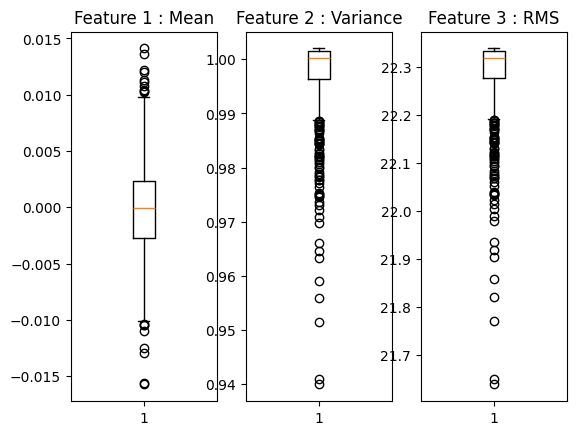

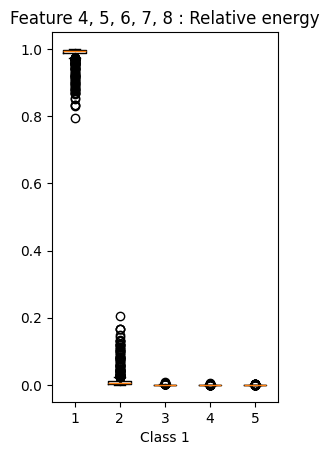

In [103]:
X1 = test_np
Y1=compute_features(X1)
#Y2=compute_features(X2)

plt.figure("Boxplot of the features values on each class (1 to 3)")
plt.subplot(1,3,1)
plt.boxplot([Y1[0,:]])
plt.title("Feature 1 : Mean")
plt.subplot(1,3,2)
plt.boxplot([Y1[1,:]])
plt.title("Feature 2 : Variance")
plt.subplot(1,3,3)
plt.boxplot([Y1[2,:]])
plt.title("Feature 3 : RMS")



plt.figure("Boxplot of the features values on each class (4 to 8)")
plt.subplot(1,2,1)
plt.boxplot(np.transpose(Y1[3:8,:]))
plt.title("Feature 4, 5, 6, 7, 8 : Relative energy")
plt.xlabel('Class 1')
#plt.subplot(1,2,2)
#plt.boxplot(np.transpose(Y1[3:8,:]))
#plt.title("Feature 4, 5, 6, 7, 8 : Relative energy")
#plt.xlabel('Class 2')
plt.show()

<Axes: >

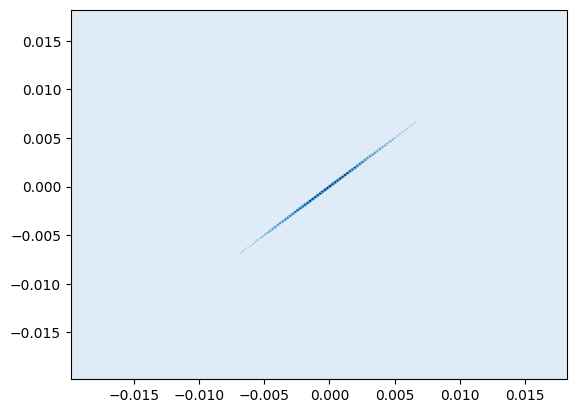

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Générer des données d'exemple
np.random.seed(0)
#x = np.random.randn(500)
#y = np.random.randn(500) + x * 0.5  # Corrélées avec x

# Tracer la densité avec isolignes
sns.kdeplot(x=Y1[0,:], y=Y1[0,:], cmap="Blues", fill=True, thresh=0, levels=10)




In [111]:
def my_pca(X):
    D,M=np.shape(X)
    X_=np.zeros((D,M))
    for d in range(D):
        X_[d,:]=(X[d,:]-np.mean(X[d,:]))/np.std(X[d,:])
    U,S,Vt=np.linalg.svd(X_)
    var_exp=S**2/(M-1)
    S2=np.zeros((D,M))
    S2[:D,:D]=np.diag(S)
    return U, np.dot(S2,Vt), var_exp

In [112]:
def plot_correlation_circle(U,feature_names,var_exp):
    D,D=np.shape(U)
    figure, axes = plt.subplots()
    for d in range(D):
        plt.plot([0,U[d,0]],[0,U[d,1]])
        plt.text(U[d,0]+0.01, U[d,1]+0.01,feature_names[d])
    theta = np.linspace(0, 2*np.pi, 100)
    radius = 1
    a = radius*np.cos(theta)
    b = radius*np.sin(theta)
    axes.set_aspect(1)
    v=np.round(1000*var_exp/np.sum(var_exp))/10
    plt.plot(a,b,'k')   
    plt.xlabel("PC1 : "+str(v[0])+" % of total variance")
    plt.ylabel("PC2 : "+str(v[1])+" % of total variance")
    plt.show()

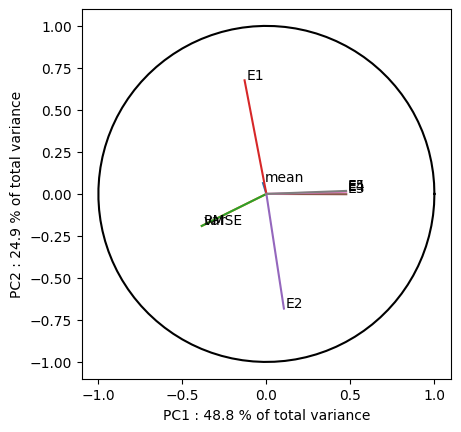

In [115]:
 # Computation of PCA
Y =np.concatenate((Y1,Y1),axis=1)
D,M=np.shape(Y)
U,S_,var_exp=my_pca(Y)

feature_names = [
  'mean',
  'var',
  'RMSE',
  'E1', 'E2', 'E3', 'E4','E5']
plot_correlation_circle(U,feature_names,var_exp)

In [116]:
# Computes the Pearson correlation coefficient
def pearson_coefficient(x,y):
    N=np.size(x)
    x_=(x-np.mean(x))/np.std(x)
    y_=(y-np.mean(y))/np.std(y)
    c=np.dot(x_,y_)/N
    return c

In [117]:
# Computation, for each feature, of Pearson correlation coefficient between the data and the annotations
c=np.zeros((D,))
for d in range(D):
    c[d]=pearson_coefficient(Y[d,:],y)

print("Pearson correlation scores")
ind = np.argsort(np.abs(c))
ind=ind[::-1]
for d in range(D):
    print("Feature ", feature_names[ind[d]], " : ",c[ind[d]])

ValueError: shapes (1620,) and (500,) not aligned: 1620 (dim 0) != 500 (dim 0)